## **Identify Bengali Handwritten Digits**

- **Dataset**
    - [NumtaDB: Bengali Handwritten Digits](https://www.kaggle.com/BengaliAI/numta/)
- **Train data set 90%**
-**Test data set 10%**

**Install dependencies**

In [ ]:

!pip install kaggle

**Kaggle User API Import** 

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdzahidfesabelilla","key":"4cbf3deb9ef668a2834a53c5259e67e1"}'}

**Change file access permission** 

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

#change permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 !kaggle datasets download -d BengaliAI/numta

numta.zip: Skipping, found more recently modified local copy (use --force to force download)


**Unzip Dataset**

In [ ]:
from zipfile import ZipFile
fileName = "numta.zip"

with ZipFile(fileName,'r') as zip:
  zip.extractall()
  print('Done')


Done


**Show 'training-a.csv' file first top 5 row**

In [ ]:
import pandas as pd
df = pd.read_csv('training-a.csv')
df.head()


,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
PATH = '/content/'
os.listdir(PATH)

['.config',
 'testing-f',
 'training-a',
 'numta.zip',
 'testing-auga',
 'training-b',
 'testing-a',
 'training-b.csv',
 'training-a.csv',
 'training-c',
 'testing-e',
 'training-e',
 'training-c.csv',
 'training-d',
 'testing-b',
 'testing-augc',
 'training-d.csv',
 'training-e.csv',
 'testing-d',
 'kaggle.json',
 'testing-c',
 'testing-all-corrected',
 'sample_data']

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

**Show all column name**

In [ ]:
a_csv = showRawTrainingSamples('training-a.csv')
c_csv = showRawTrainingSamples('training-c.csv')

training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')


**useless column drop**

In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
c_csv = dropColumns(c_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png      2
4      c00004.png      7
...           ...    ...
24293  c24293.png      3
24294  c24294.png      2
24295  c24295.png      7
24296  c24296.png      2
24297  c24297.png      7

[24298 rows x 2 columns]
     filename  digit
0  c00000.png      6
1  c00001.png      1
2  c00002.png      3
3  c00003.png      2
4  c00004.png      7


In [ ]:
total_csv = [a_csv, c_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

44000


In [ ]:
TRAIN_PATH = 'train'
os.mkdir(TRAIN_PATH)

**Data process and store them in 'training-a' and 'training-c' directory**

In [ ]:
def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

In [ ]:
processImages('training-a')
print('A Done')
processImages('training-c')
print('C Done')

A Done
C Done


#**Settings #1**

*   **Batch Size = 100**
*   **Number of iterations = 6000**
*   **Learning Rate = 0.001**






In [ ]:
###################
# Settings01
###################

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

**Inspecting a single image (28 pixel x 28 pixel) 28x28 matrix of numbers** 


In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))



Trainig Samples:  44000


In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 6000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Split data 10% for testing and 90% for traning**

In [ ]:
#batch size


# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:396
Test dataloader:44


In [ ]:
print(len(train_sampler))
print(len(test_sampler))

39600
4400


In [ ]:
train_data[0]

(tensor([[[ 0.6392,  0.6392,  0.6392,  0.6392,  0.6471,  0.6392,  0.6392,
            0.6471,  0.6392,  0.6392,  0.6471,  0.6392,  0.6314,  0.6314,
            0.6392,  0.6314,  0.6235,  0.6314,  0.6392,  0.6314,  0.6314,
            0.6314,  0.6392,  0.6392,  0.6471,  0.6471,  0.6471,  0.6471],
          [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,
            0.6471,  0.6471,  0.6471,  0.6392,  0.6392,  0.6392,  0.6392,
            0.6314,  0.6314,  0.6314,  0.6314,  0.6392,  0.6392,  0.6471,
            0.6471,  0.6392,  0.6392,  0.6392,  0.6392,  0.6392,  0.6471],
          [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6549,  0.6549,
            0.6471,  0.6549,  0.6471,  0.6392,  0.6471,  0.6471,  0.6392,
            0.6392,  0.6392,  0.6314,  0.6314,  0.6392,  0.6392,  0.6392,
            0.6392,  0.6392,  0.6392,  0.6392,  0.6314,  0.6471,  0.6471],
          [ 0.6471,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,
            0.6549,  0.6549,  0.647

In [ ]:
# One Image Size
print(train_data[0][0].size())
print(train_data[0][0].numpy().shape)
# First Image Label
print(train_data[0][1])

torch.Size([1, 28, 28])
(1, 28, 28)
5


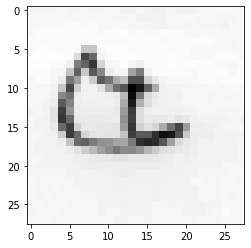

In [ ]:
## Displaying a  Image

import matplotlib.pyplot as plt 
import numpy as np

show_img = train_data[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

Label:
1


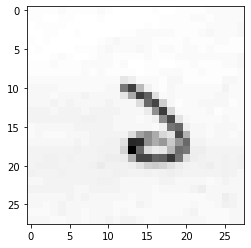

In [ ]:
## Displaying another MNIST Image
# Label
print("Label:")
print(train_data[2][1])

show_img = train_data[2][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

### Step #1 : Design Logistic Regression Model using class

In [ ]:
##Step #1 : Design  model using class

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

###Step #2 : Construct loss and optimizer (select from PyTorch API)

Unlike linear regression, we do not use MSE here, we need Cross Entropy Loss to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes softmax **([Logistic or Sigmoid]/softmax function)**
2. Computes Cross Entropy Loss

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = num_iters / (len(train_sampler) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
num_epochs

15

###Step #3 : Training: forward, loss, backward, step

In [ ]:

'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 100. Loss: 2.309612512588501. Accuracy: 10.363636363636363
Iteration: 200. Loss: 2.2903451919555664. Accuracy: 9.590909090909092
Iteration: 300. Loss: 2.291741371154785. Accuracy: 13.681818181818182
Iteration: 400. Loss: 2.310459852218628. Accuracy: 10.954545454545455
Iteration: 500. Loss: 2.287252426147461. Accuracy: 14.113636363636363
Iteration: 600. Loss: 2.2858686447143555. Accuracy: 12.431818181818182
Iteration: 700. Loss: 2.2976233959198. Accuracy: 12.886363636363637
Iteration: 800. Loss: 2.300236463546753. Accuracy: 14.772727272727273
Iteration: 900. Loss: 2.2729990482330322. Accuracy: 14.318181818181818
Iteration: 1000. Loss: 2.279088020324707. Accuracy: 12.909090909090908
Iteration: 1100. Loss: 2.27622389793396. Accuracy: 17.65909090909091
Iteration: 1200. Loss: 2.262368679046631. Accuracy: 14.136363636363637
Iteration: 1300. Loss: 2.285778284072876. Accuracy: 16.59090909090909
Iteration: 1400. Loss: 2.270604372024536. Accuracy: 17.568181818181817
Iteration: 1500. L

[2.309612512588501, 2.2903451919555664, 2.291741371154785, 2.310459852218628, 2.287252426147461, 2.2858686447143555, 2.2976233959198, 2.300236463546753, 2.2729990482330322, 2.279088020324707, 2.27622389793396, 2.262368679046631, 2.285778284072876, 2.270604372024536, 2.273869276046753, 2.265467405319214, 2.271723985671997, 2.2659926414489746, 2.274838924407959, 2.257707118988037, 2.266192674636841, 2.2641425132751465, 2.2633094787597656, 2.2562057971954346, 2.241732120513916, 2.240586757659912, 2.270380735397339, 2.2514936923980713, 2.2447824478149414, 2.2552149295806885, 2.2480318546295166, 2.225597381591797, 2.225862741470337, 2.2675211429595947, 2.2174887657165527, 2.242710590362549, 2.2163872718811035, 2.2556934356689453, 2.2390079498291016, 2.2288336753845215, 2.2368838787078857, 2.2180705070495605, 2.207188606262207, 2.219587802886963, 2.21110463142395, 2.2154903411865234, 2.211791753768921, 2.211024761199951, 2.228137254714966, 2.1851084232330322, 2.2063064575195312, 2.2378051280

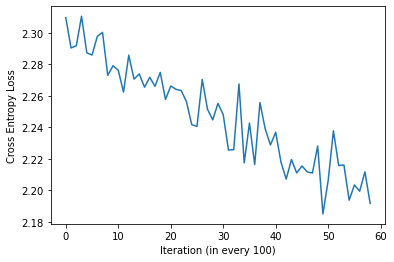

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 100)')
plt.show()

In [ ]:

from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Mount/Assignment01/'

Mounted at /content/gdrive


**Save Model**

In [ ]:
##Save Model

save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Assignment01.pkl') 

**Load Model**

In [ ]:
#Load Model
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Assignment01.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


### Testing Loaded Model with Digits




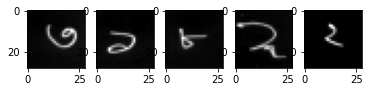

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [3 0 8 0 4]


In [ ]:
###################
# Settings02
###################

#**Settings #2**

*   **Batch Size = 100**
*   **Number of iterations = 10000**
*   **Learning Rate = 0.001**






In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 10000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = num_iters / (len(train_sampler) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

25


In [ ]:
#Step #3 : Training: forward, loss, backward, step

'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 50. Loss: 2.1010818481445312. Accuracy: 36.93181818181818
Iteration: 100. Loss: 2.1330761909484863. Accuracy: 36.04545454545455
Iteration: 150. Loss: 2.1437528133392334. Accuracy: 38.5
Iteration: 200. Loss: 2.1008472442626953. Accuracy: 36.72727272727273
Iteration: 250. Loss: 2.1070849895477295. Accuracy: 38.20454545454545
Iteration: 300. Loss: 2.1547129154205322. Accuracy: 37.54545454545455
Iteration: 350. Loss: 2.1152374744415283. Accuracy: 33.84090909090909
Iteration: 400. Loss: 2.1435937881469727. Accuracy: 37.43181818181818
Iteration: 450. Loss: 2.147982120513916. Accuracy: 37.0
Iteration: 500. Loss: 2.1368439197540283. Accuracy: 36.15909090909091
Iteration: 550. Loss: 2.1035280227661133. Accuracy: 36.72727272727273
Iteration: 600. Loss: 2.112720489501953. Accuracy: 36.95454545454545
Iteration: 650. Loss: 2.1237258911132812. Accuracy: 35.93181818181818
Iteration: 700. Loss: 2.0720348358154297. Accuracy: 37.15909090909091
Iteration: 750. Loss: 2.172534227371216. Accuracy

[2.1010818481445312, 2.1330761909484863, 2.1437528133392334, 2.1008472442626953, 2.1070849895477295, 2.1547129154205322, 2.1152374744415283, 2.1435937881469727, 2.147982120513916, 2.1368439197540283, 2.1035280227661133, 2.112720489501953, 2.1237258911132812, 2.0720348358154297, 2.172534227371216, 2.1346991062164307, 2.0804758071899414, 2.132746458053589, 2.129570960998535, 2.1064183712005615, 2.151762008666992, 2.115255355834961, 2.052145004272461, 2.1411259174346924, 2.174785852432251, 2.078317165374756, 2.0613152980804443, 2.100247383117676, 2.113332509994507, 2.0612382888793945, 2.0781164169311523, 2.079806327819824, 2.0910229682922363, 2.0497422218322754, 2.1169259548187256, 2.0503602027893066, 2.1342010498046875, 2.1002981662750244, 2.116353988647461, 2.0562992095947266, 2.1136131286621094, 2.135413885116577, 2.094191551208496, 2.116331100463867, 2.0657477378845215, 2.1105873584747314, 2.099709987640381, 2.070204019546509, 2.105360507965088, 2.065861940383911, 2.091783046722412, 2

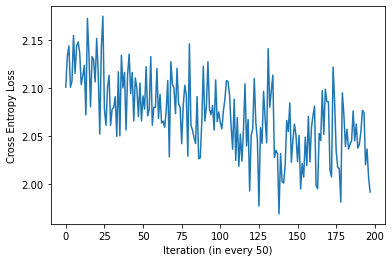

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 50)')
plt.show()

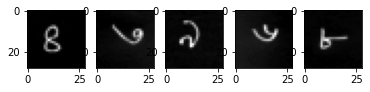

In [ ]:
for images, labels in test_loader:
    break
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [8 3 9 6 8]


In [ ]:

from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Mount/Assignment01/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
##Save Model

save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Assignment01.2.pkl') 

In [ ]:
##Load Model
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Assignment01.2.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
###################
# Settings03
###################

#**Settings #3**

*   **Batch Size = 80**
*   **Number of iterations = 15000**
*   **Learning Rate = 0.0001**






In [ ]:
# Hyperparameters

batch_size = 80
num_iters = 15000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = num_iters / (len(train_sampler) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

30


In [ ]:
#Step #3 : Training: forward, loss, backward, step

'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(images.shape[0], -1).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 30 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 30. Loss: 2.0220046043395996. Accuracy: 39.59090909090909
Iteration: 60. Loss: 2.0544538497924805. Accuracy: 39.09090909090909
Iteration: 90. Loss: 2.0096218585968018. Accuracy: 38.61363636363637
Iteration: 120. Loss: 2.0123114585876465. Accuracy: 38.79545454545455
Iteration: 150. Loss: 2.007127046585083. Accuracy: 38.72727272727273
Iteration: 180. Loss: 2.1016194820404053. Accuracy: 39.52272727272727
Iteration: 210. Loss: 2.095707893371582. Accuracy: 39.5
Iteration: 240. Loss: 2.0156211853027344. Accuracy: 39.65909090909091
Iteration: 270. Loss: 2.000741958618164. Accuracy: 39.40909090909091
Iteration: 300. Loss: 1.9882179498672485. Accuracy: 38.61363636363637
Iteration: 330. Loss: 2.040261745452881. Accuracy: 39.47727272727273
Iteration: 360. Loss: 1.990473985671997. Accuracy: 39.68181818181818
Iteration: 390. Loss: 2.120086908340454. Accuracy: 38.90909090909091
Iteration: 420. Loss: 2.05904221534729. Accuracy: 39.11363636363637
Iteration: 450. Loss: 2.0312066078186035. Ac

In [ ]:
##Save Model

save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Assignment01.3.pkl') 


In [ ]:
##Load Model
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Assignment01.3.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


[2.0220046043395996, 2.0544538497924805, 2.0096218585968018, 2.0123114585876465, 2.007127046585083, 2.1016194820404053, 2.095707893371582, 2.0156211853027344, 2.000741958618164, 1.9882179498672485, 2.040261745452881, 1.990473985671997, 2.120086908340454, 2.05904221534729, 2.0312066078186035, 2.034032106399536, 2.0612897872924805, 2.077653169631958, 2.051701784133911, 1.997746229171753, 2.0067074298858643, 2.085881233215332, 2.0416970252990723, 2.0212459564208984, 1.997682809829712, 2.04428768157959, 2.016954183578491, 2.0257043838500977, 2.030891180038452, 2.0766196250915527, 2.022493362426758, 1.9399299621582031, 2.0150818824768066, 2.0218753814697266, 1.98829984664917, 1.93929123878479, 2.0666635036468506, 1.9985498189926147, 1.9992491006851196, 2.0764522552490234, 2.059485673904419, 2.002805233001709, 2.0516440868377686, 2.0056777000427246, 1.9916490316390991, 2.027026414871216, 2.093116044998169, 1.9998970031738281, 1.984562635421753, 2.0855727195739746, 2.023768424987793, 2.141441

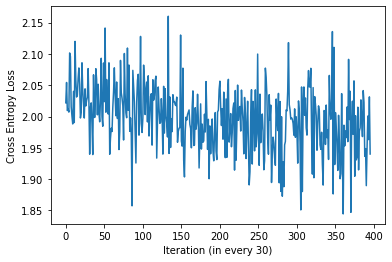

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 30)')
plt.show()

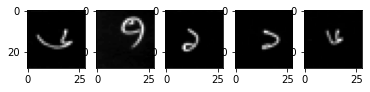

In [ ]:
for images, labels in test_loader:
    break
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [6 7 1 3 6]


**Result Table:-**

| Settings #1      | Settings #2     | Settings #3     |
| :------------- | :----------: | -----------: |
|  Batch Size = 100 | Batch Size = 100   | Batch Size = 80    |
|  Number of iterations = 6000 | Number of iterations = 10000   | Number of iterations = 15000    |
|  Learning Rate = 0.001 | Learning Rate = 0.001   | Learning Rate = 0.0001 |
| Accuracy : 29.5454   | Accuracy : 38.8181 | Accuracy : 40.3409 | |
